<a href="https://colab.research.google.com/github/VivekanandaMudelli/hand_drawn_sketch_recognition/blob/main/KNN(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [45]:
file_id = "1QfzguI680h2Od7VXoPTypVr2h-DWwvkk"

# Construct the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "data.csv"  # Change filename as needed
gdown.download(download_url, output, quiet=False)

# Read the CSV file
data = pd.read_csv(output)
data = data.dropna()

X = data.drop(data.columns[0],axis = 1).drop(columns = ['encoded_part','extracted_part'])
y = data['encoded_part']

print(X.shape)
print(y.shape)

Downloading...
From (original): https://drive.google.com/uc?id=1QfzguI680h2Od7VXoPTypVr2h-DWwvkk
From (redirected): https://drive.google.com/uc?id=1QfzguI680h2Od7VXoPTypVr2h-DWwvkk&confirm=t&uuid=59e40022-ca9c-42ec-bc40-1a10f219270a
To: /content/data.csv
100%|██████████| 634M/634M [00:06<00:00, 99.4MB/s]


(16000, 2048)
(16000,)


In [34]:
def distance(x,y):
  return np.linalg.norm(x-y)

In [35]:
def k_nearest_neighbors(p, points, k):
    dist = [distance(p,p1) for p1 in points]
    neighborId = np.argsort(dist)
    neighbor = [points[i] for i in neighborId[:k]]

    Knn = [neighbor,neighborId[:k]]
    return Knn

In [36]:
import statistics as st

def knn_predict(X_train, y_train, testPoint, k):
  a,b = k_nearest_neighbors(testPoint,X_train,k)# a maps to the list of points and b maps to the list of indices
  k_labels = [y_train[i] for i in b] #list of labels for the k nearest neighbors
  return st.mode(k_labels)

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=42)
X_train=X_train.values
y_train=y_train.values
X_val=X_val.values
y_val=y_val.values

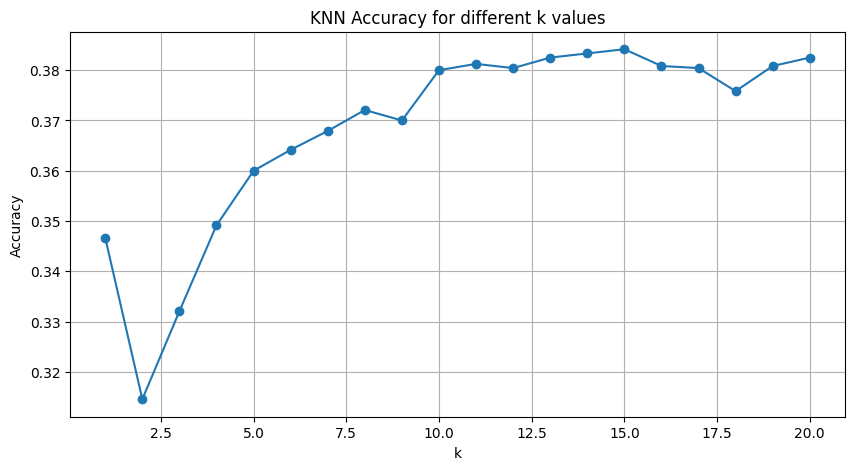

In [47]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy for different k values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [49]:
max_accuracy = max(accuracies)
max_k = k_values[accuracies.index(max_accuracy)]
max_k

15

In [50]:
k= max_k
predictions=[]
for testPoint in tqdm(X_val, desc="Predicting", unit="sample"):
    predictions.append(knn_predict(X_train, y_train, testPoint, k))

Predicting: 100%|██████████| 2400/2400 [17:35<00:00,  2.27sample/s]


In [51]:
accuracy = accuracy_score(y_val, predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 39.88%
